In [1]:
from sklearn import preprocessing as pp
from sklearn import feature_selection as fs
from sklearn import decomposition as dr
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from pprint import pprint
from kneed import KneeLocator
import seaborn as sns
import random
import os
import pickle

def eval_distortion(
    fs_array:np.ndarray,  
    random_state:int, 
    max_clusters=None, 
    name='test', 
    plot_distortion=False,):

    inertias = list()
    distortions = list()

    if max_clusters:
        K = range(1, max_clusters+1)
    else:
        K = range(1, fs_array.shape[0]+1)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=random_state).fit(fs_array)
        #This returns the distortion (average euclidean squared distance from the centroid of the respective clusters)
        distortions.append(sum(np.min(cdist(fs_array, kmeanModel.cluster_centers_, 'euclidean'),axis=1)**2))

        #This returns the inertia (sum of squared distances of samples to their closest cluster center)
        inertias.append(kmeanModel.inertia_)
    
    if plot_distortion:
        fig = plt.figure()
        #Based on Distortion
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Distortion')
        plt.title(f'Distortion Plot vs. Clusters {name}')
        fig.savefig(f'{name}_distortion.png')

    return (list(K),distortions)

def kneed_eval_distortion(
        ax, 
        clusters: list, 
        distortions:list, 
        ):
    '''Utilize Kneed Algorithm to choose an elbow point on the plot. 
    Returns the knee value chosen.
    
    Citation:

    Satopää, V. et al. Finding a “Kneedle” in a Haystack. 
    IEEE ICDCS SIMPLEX Workshop 2011.
    '''

    x_val = clusters
    y_val = distortions

    assert len(x_val) == len(y_val), f'clusters != distortions:\n{clusters}\n{distortions}'

    kl = KneeLocator(x_val, y_val, curve='convex', direction='decreasing', online=True)

    ax.plot(x_val, y_val/np.max(y_val), 'bx-')
    ax.plot(x_val, kl.y_difference, 'r-')
    ax.axvline(kl.knee)

    ax.set_xlabel("Number of Clusters", fontsize=18)
    ax.set_ylabel("Normalized Distortion",fontsize=18)
    ax.set_xlim((0,50))
    ax.set_ylim((0,1))
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

    ax.text(kl.knee+0.1,0.5, f'{kl.knee}')
    ax.legend(['Normalized Distortion', 'Y difference', 'Maximum Difference'])

    plt.tight_layout()

    return kl.knee



For MaxVol

0 Mono Axes(0.125,0.53;0.168478x0.35)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


1 Gem Axes(0.301418,0.552222;0.197663x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


2 Cis Axes(0.555063,0.552222;0.178573x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


3 Trans Axes(0.802344,0.552222;0.178573x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


4 TriQ2 Axes(0.0605,0.0451944;0.178292x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


5 TriQ3 Axes(0.3075,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


6 TriQ4 Axes(0.5545,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


7 Tetra Axes(0.8015,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


Knee Analysis for All Alkene Classes Aligned with MaxVol


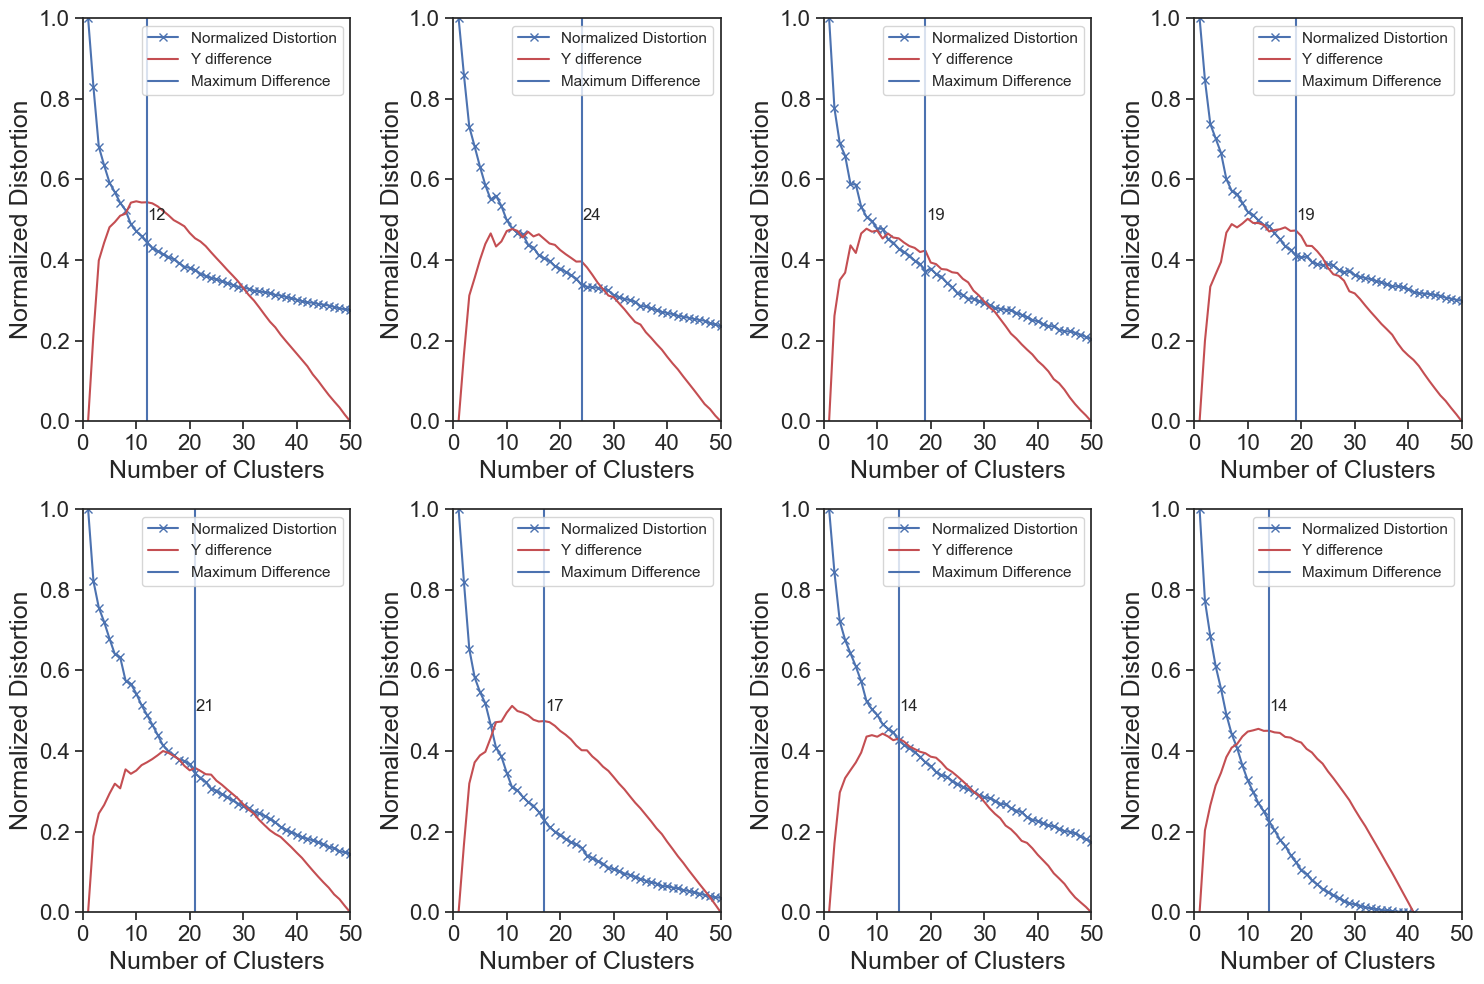

{'Mono': np.int64(12),
 'Gem': np.int64(24),
 'Cis': np.int64(19),
 'Trans': np.int64(19),
 'TriQ2': np.int64(21),
 'TriQ3': np.int64(17),
 'TriQ4': np.int64(14),
 'Tetra': np.int64(14)}
For BFSVol

0 Mono Axes(0.125,0.53;0.168478x0.35)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


1 Gem Axes(0.301418,0.552222;0.197663x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


2 Cis Axes(0.555063,0.552222;0.178573x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


3 Trans Axes(0.802344,0.552222;0.178573x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


4 TriQ2 Axes(0.0605,0.0451944;0.178292x0.421778)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


5 TriQ3 Axes(0.3075,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


6 TriQ4 Axes(0.5545,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


7 Tetra Axes(0.8015,0.07975;0.178292x0.40325)


C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
C:\Users\BlakeOcampo\AppData\Local\Temp\ipykernel_21352\272788937.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


Knee Analysis for All Alkene Classes Aligned with BFSVol


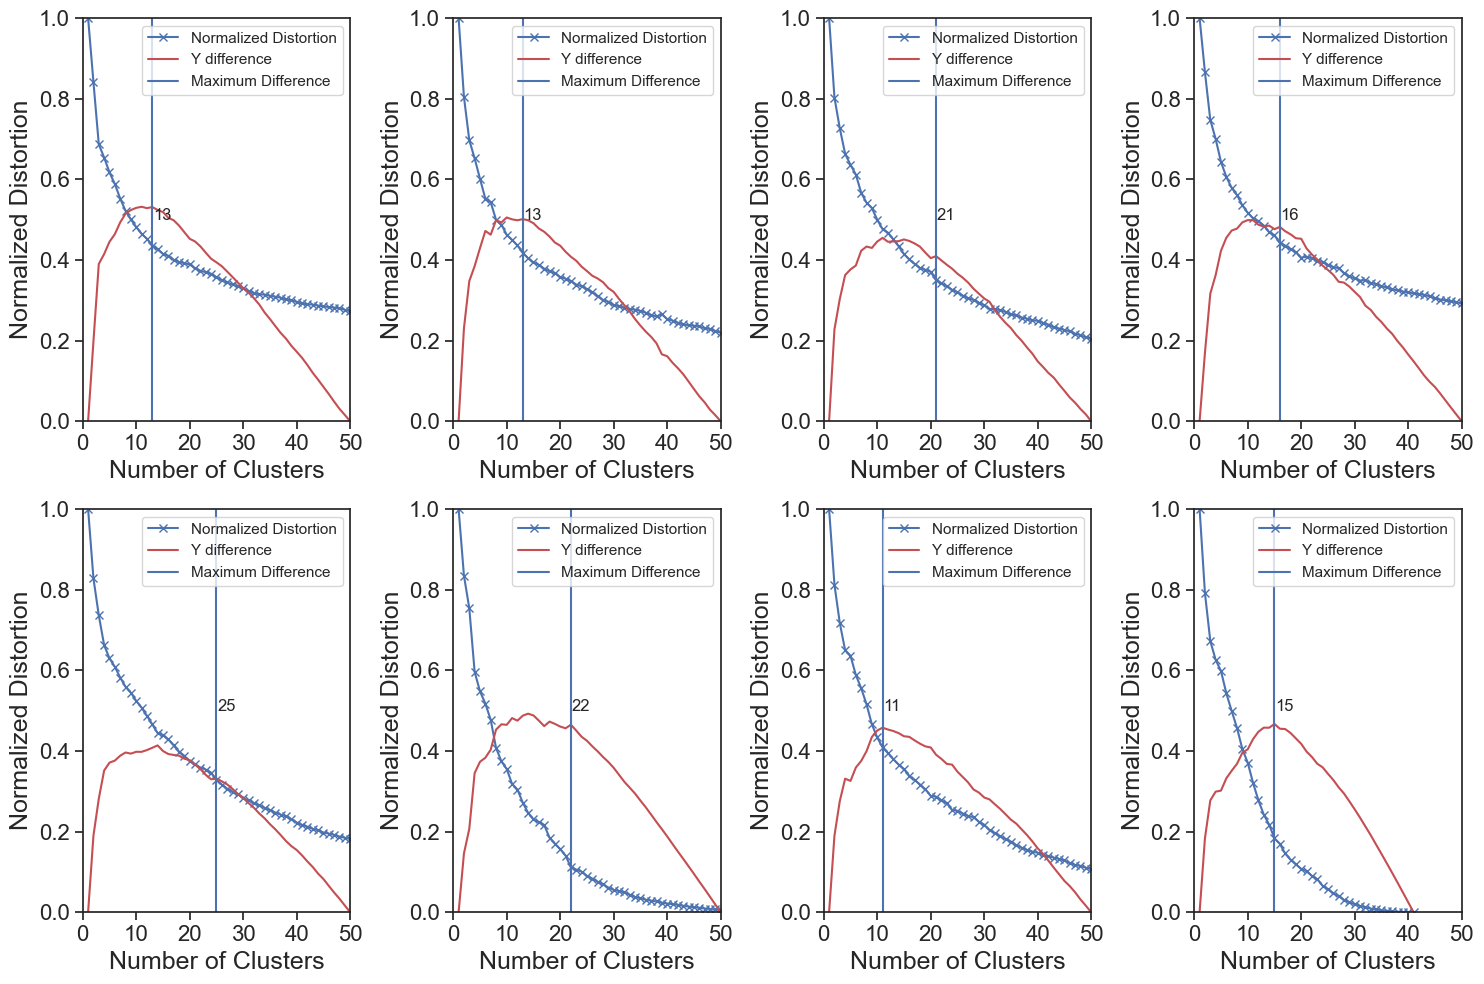

{'Mono': np.int64(13),
 'Gem': np.int64(13),
 'Cis': np.int64(21),
 'Trans': np.int64(16),
 'TriQ2': np.int64(25),
 'TriQ3': np.int64(22),
 'TriQ4': np.int64(11),
 'Tetra': np.int64(15)}


In [2]:
random_state = 42
np.random.seed(42)
random.seed(42)
sns.set_theme(style='ticks',font='Arial')

alk_types = [
"Mono",
"Gem",
"Cis",
"Trans",
"TriQ2",
"TriQ3",
"TriQ4",
"Tetra",
]

vols = ['MaxVol', 'BFSVol']

for vol_type in vols:

    fig, axes = plt.subplots(2,4, figsize=(15,10))

    knee_res = dict()

    with open(f'DB_EX_Name_{vol_type}_Map.pkl','rb') as f:
        db_ex_name_map = pickle.load(f)

    with open(f'EV_EX_Name_{vol_type}_Map.pkl', 'rb') as f:
        ev_ex_name_map = pickle.load(f)
        
    print(f'For {vol_type}\n')
    for i, (alk_type, ax) in enumerate(zip(alk_types, axes.flat)):
        print(i, alk_type, ax)

        # Isolates alkenes in external dataset
        ex_df_w_type = pd.read_csv(f"External_Full_Alkene_Desc_{vol_type}.csv", index_col=0)
        ex_df_alk_type = ex_df_w_type.loc[ex_df_w_type['Alkene Type'] == alk_type]
        ex_desc_df = ex_df_alk_type.loc[:, ex_df_alk_type.columns != 'Alkene Type']

        # Isolates alkenes in the database
        desc_df_w_type = pd.read_csv(f"Database_Full_Alkene_Desc_{vol_type}.csv", index_col=0)
        desc_df_alk_type = desc_df_w_type.loc[desc_df_w_type['Alkene Type'] == alk_type]
        db_desc_df = desc_df_alk_type.loc[:, desc_df_alk_type.columns != 'Alkene Type']

        #Removes redundant values between the SAD Database and External Dataset
        redundant_sad_ex = ex_desc_df.index.isin(list(db_ex_name_map.values()))

        fix_ex_desc_df = ex_desc_df[~redundant_sad_ex]    

        merge_db_ex = pd.concat([db_desc_df, fix_ex_desc_df])

        pipe = Pipeline(
        steps=[("scaler", pp.MinMaxScaler()), ("vt", fs.VarianceThreshold(threshold=0))]
        )
        merge_db_fs_array = pipe.fit_transform(merge_db_ex)

        #Defines a maximum of 50 clusters
        if merge_db_fs_array.shape[0] > 50:
            max_clusters = 50
        else:
            max_clusters = merge_db_fs_array.shape[0]
        
        #Returns clusters and distortions
        clusters,distortions = eval_distortion(
            fs_array=merge_db_fs_array,
            random_state=random_state,
            max_clusters=max_clusters,
            plot_distortion=False
        )


        knee_val = kneed_eval_distortion(
            ax=ax,
            clusters=clusters,
            distortions=distortions,
        )
        
        knee_res[alk_type] = knee_val
    
    plt.tight_layout()
    print(f'Knee Analysis for All Alkene Classes Aligned with {vol_type}')
    plt.show()

    with open(f'{vol_type}_Kneed_Values.pkl', 'wb') as f:
        pickle.dump(knee_res,f)

    pprint(knee_res, sort_dicts=False)